In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=1
import matplotlib.pyplot as plt
from utils.utils import get_path
from utils.fig_utils import full_dist_to_print, dataset_to_print, dist_to_color, dist_to_print
from utils.io_utils import load_multiple_res, dist_kwargs_to_str
from utils.pd_utils import compute_outlier_scores, filter_dgms
import os
import numpy as np
import matplotlib

env: CUDA_VISIBLE_DEVICES=1


In [2]:
style_file = "utils.style"
plt.style.use(style_file)

In [3]:
root_path = get_path("data")
fig_path = os.path.join(root_path, "figures")

# Fig hyperparameter sensitivity

In [4]:
datasets = ["toy_circle", "inter_circles", "eyeglasses"]
embd_dim = 50
sigmas = np.linspace(0.0, 0.35, 29)
sigmas = np.array([np.format_float_positional(sigma, precision=4, unique=True, trim='0') for sigma in sigmas]).astype(float)
seeds = [0, 1, 2]
n = 1000

# different datas
sigmas_per_dataset = {}
for dataset in datasets:
    if dataset == "eyeglasses":
        sigmas_per_dataset[dataset] = sigmas[:13]
    else:
        sigmas_per_dataset[dataset] = sigmas

In [5]:
distances = {
    "euclidean": [{}],
    "eff_res": [
        {"corrected": True, "weighted": False, "k": 15, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 100, "disconnect": True, },
         # varying k
        {"corrected": True, "weighted": False, "k": 4, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 30, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 45, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 60, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 75, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 90, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 105, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 120, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 135, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 150, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 300, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 500, "disconnect": True},
    ],
    "diffusion": [
        {"k": 15, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 15, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 64, "kernel": "sknn", "include_self": False},
        
        {"k": 15, "t": 2, "kernel": "sknn", "include_self": False},
        {"k": 15, "t": 4, "kernel": "sknn", "include_self": False},
        {"k": 15, "t": 16, "kernel": "sknn", "include_self": False},
        {"k": 15, "t": 32, "kernel": "sknn", "include_self": False},
        {"k": 15, "t": 128, "kernel": "sknn", "include_self": False},
        {"k": 15, "t": 256, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 2, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 4, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 16, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 32, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 128, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 256, "kernel": "sknn", "include_self": False},
        # varying k
        {"k": 4, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 30, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 45, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 60, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 75, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 90, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 105, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 120, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 135, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 150, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 4, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 30, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 45, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 60, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 75, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 90, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 105, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 120, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 135, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 150, "t": 8, "kernel": "sknn", "include_self": False},
    ],
}

In [6]:
#load data
all_res = {}
for dataset in datasets:
    all_res[dataset] = load_multiple_res(datasets=dataset,
                                         distances=distances,
                                         root_path=get_path("data"),
                                         n=n,
                                         seeds=seeds,
                                         sigmas=sigmas_per_dataset[dataset],
                                         embd_dims=embd_dim,
                                         n_threads=10)

Done with toy_circle 50 euclidean n_outliers=0, perturbation=None
Done with toy_circle 50 eff_res_corrected_True_weighted_False_k_15_disconnect_True n_outliers=0, perturbation=None
Done with toy_circle 50 eff_res_corrected_True_weighted_False_k_100_disconnect_True n_outliers=0, perturbation=None
Done with toy_circle 50 eff_res_corrected_True_weighted_False_k_4_disconnect_True n_outliers=0, perturbation=None
Done with toy_circle 50 eff_res_corrected_True_weighted_False_k_30_disconnect_True n_outliers=0, perturbation=None
Done with toy_circle 50 eff_res_corrected_True_weighted_False_k_45_disconnect_True n_outliers=0, perturbation=None
Done with toy_circle 50 eff_res_corrected_True_weighted_False_k_60_disconnect_True n_outliers=0, perturbation=None
Done with toy_circle 50 eff_res_corrected_True_weighted_False_k_75_disconnect_True n_outliers=0, perturbation=None
Done with toy_circle 50 eff_res_corrected_True_weighted_False_k_90_disconnect_True n_outliers=0, perturbation=None
Done with toy_

In [7]:
# threshold diagrams
dob = 1.25
all_res = filter_dgms(dgms=all_res, dob=dob, dim=1, binary=True)

In [8]:
# compute the detection score
cycles_per_dataset = {
    1: {
        "toy_circle": 1,
        "inter_circles": 2,
        "eyeglasses": 1,}
}

outlier_scores_1d = {dataset: compute_outlier_scores(all_res[dataset], 
                                                     n_features=cycles_per_dataset[1][dataset],
                                                     dim=1)
                     for dataset in cycles_per_dataset[1]}

outlier_scores = {
    1: outlier_scores_1d,
}

In [9]:
# compute area under the curves
aucs = {}

for feature_dim in outlier_scores:
    auc_by_feature_dim = {}
    for dataset in outlier_scores[feature_dim]:
        auc_by_dataset = {}
        for dist in outlier_scores[feature_dim][dataset]:
            auc_per_method = {}
            for full_dist in outlier_scores[feature_dim][dataset][dist]:
                auc_per_method[full_dist] = {"mean": outlier_scores[feature_dim][dataset][dist][full_dist].mean(1).sum() / len(sigmas_per_dataset[dataset]),
                                             "std":  np.std(outlier_scores[feature_dim][dataset][dist][full_dist].sum(0) / len(sigmas_per_dataset[dataset])) }
                
            auc_by_dataset[dist] = auc_per_method
        auc_by_feature_dim[dataset] = auc_by_dataset
    aucs[feature_dim] = auc_by_feature_dim

In [11]:
# prepare data for plotting
ks = np.array([4, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150]) # eff res also has 300, 500
ts = np.array([2, 4, 8, 16, 32, 64, 128, 256])

params = [ks, ks, ts]
param_names = ["number of neighbors k", "number of neighbors k", "diffusion steps t"]
auc_dists = [["eff_res"], ["diffusion_t_8", "diffusion_t_64"], ["diffusion_k_15", "diffusion_k_100"]]
dists = ["eff_res", "diffusion", "diffusion"]

dist_names = [["Eff. resistance"],["Diffusion $t=8$", "Diffusion $t=64$"], ["Diffusion $k=15$", "Diffusion $k=100$"] ] 
styles = [["-"], ["-","--"], ["-","--"]]

In [12]:
aucs_curves = {dataset: {"eff_res": 
                       {"mean": np.array([aucs[1][dataset]["eff_res"][f"eff_res_corrected_True_weighted_False_k_{k}_disconnect_True"]["mean"] for k in ks]),
                         "std":  np.array([aucs[1][dataset]["eff_res"][f"eff_res_corrected_True_weighted_False_k_{k}_disconnect_True"]["std"] for k in ks])
                    },
                   "euclidean": 
                       {"mean": np.array([aucs[1][dataset]["euclidean"]["euclidean"]["mean"]]),
                        "std": np.array([aucs[1][dataset]["euclidean"]["euclidean"]["std"]])
                                },
                   "diffusion_k_15": 
                       {"mean": np.array([aucs[1][dataset]["diffusion"][f"diffusion_k_15_t_{t}_kernel_sknn_include_self_False"]["mean"] for t in ts]),
                        "std": np.array([aucs[1][dataset]["diffusion"][f"diffusion_k_15_t_{t}_kernel_sknn_include_self_False"]["std"] for t in ts])
                                     },
                   "diffusion_k_100": 
                        {"mean": np.array([aucs[1][dataset]["diffusion"][f"diffusion_k_100_t_{t}_kernel_sknn_include_self_False"]["mean"] for t in ts]),
                         "std": np.array([aucs[1][dataset]["diffusion"][f"diffusion_k_100_t_{t}_kernel_sknn_include_self_False"]["std"] for t in ts])
                         },
                   "diffusion_t_8": 
                        {"mean": np.array([aucs[1][dataset]["diffusion"][f"diffusion_k_{k}_t_8_kernel_sknn_include_self_False"]["mean"] for k in ks]),
                         "std": np.array([aucs[1][dataset]["diffusion"][f"diffusion_k_{k}_t_8_kernel_sknn_include_self_False"]["std"] for k in ks])
                                     },
                   "diffusion_t_64":
                        {"mean": np.array([aucs[1][dataset]["diffusion"][f"diffusion_k_{k}_t_64_kernel_sknn_include_self_False"]["mean"] for k in ks]),
                         "std": np.array([aucs[1][dataset]["diffusion"][f"diffusion_k_{k}_t_64_kernel_sknn_include_self_False"]["std"] for k in ks])
                                         },
                    } for dataset in datasets}

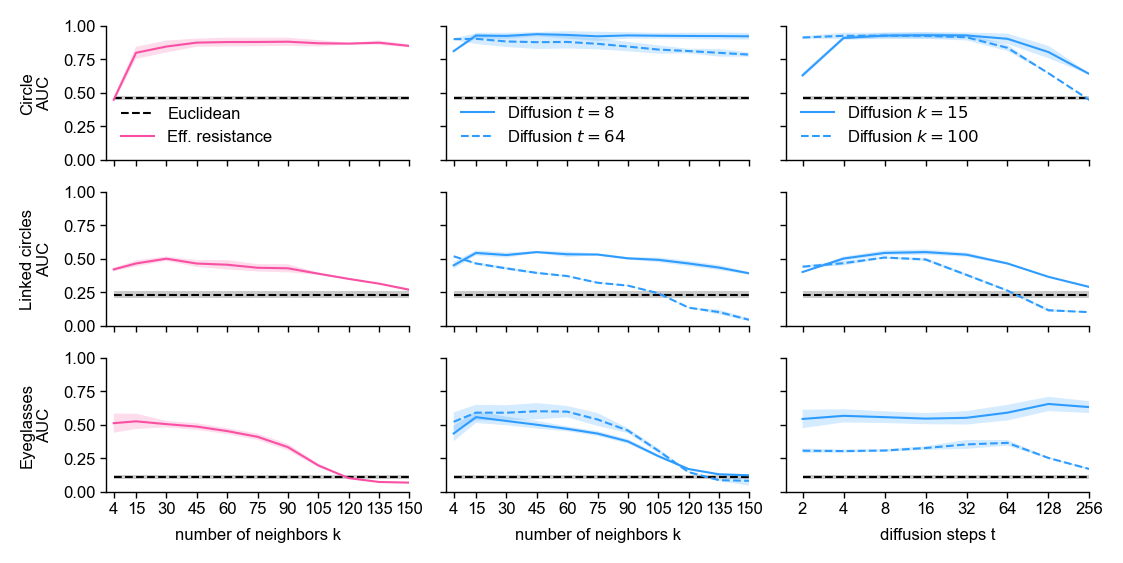

In [36]:
# plot figure
ncols = 3
fig, ax = plt.subplots(ncols=ncols, nrows=len(datasets), figsize=(5.5, 0.9*len(datasets)))

for r, dataset in enumerate(datasets):
    for c in range(ncols): 
        if len(datasets) > 1:
            cax = ax[r, c]
        else:
            cax = ax[c]
        # plot euclidean in each panel
        means_eucl = np.repeat(aucs_curves[dataset]["euclidean"]["mean"], len(params[c]))
        stds_eucl = np.repeat(aucs_curves[dataset]["euclidean"]["std"], len(params[c]))
        eucl_label = "Euclidean" if c == 0 else None
        cax.plot(params[c], means_eucl, label=eucl_label, color=dist_to_color["euclidean"], linestyle="--")
        cax.fill_between(params[c], means_eucl - stds_eucl , means_eucl + stds_eucl , alpha=0.2, color=dist_to_color["euclidean"], edgecolor=None)
        
        # plot spectral methods
        for j, param_name in enumerate(auc_dists[c]):
            mean = aucs_curves[dataset][param_name]["mean"]
            std = aucs_curves[dataset][param_name]["std"]
            cax.plot(params[c], mean, label=dist_names[c][j], color=dist_to_color[dists[c]], linestyle=styles[c][j])
            cax.fill_between(params[c], mean + std , mean - std , alpha=0.2, color=dist_to_color[dists[c]], edgecolor=None)
            
        # make plot look nice
        cax.set_ylim(0, 1)
        cax.set_ylabel(f"{dataset_to_print[dataset]}\nAUC")
        cax.set_xticks(params[c])
                
        if c == 2:
            cax.set_xlim(1.5, params[c].max())
            cax.set_xscale("log")
            cax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=2.0, subs=(0.5, 1.0)))
            cax.set_xticks(ts)
            cax.set_xticklabels(ts)
        else:
            cax.set_xlim(0, params[c].max())
        if c > 0:
            cax.set_yticklabels([])
            cax.set_ylabel("")
    
        if r==len(datasets)-1:
            cax.set_xlabel(param_names[c])
        else:
            cax.set_xlabel("")
            cax.set_xticklabels([])

        if r == 0:
            cax.legend(loc="lower left")
    
fig.savefig(os.path.join(fig_path, "1D_datasets_auc_curves.pdf"), dpi=300)